In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import util as util

In [2]:
bogger = pd.read_csv('../Orb/BoggerCycle_LD118.csv')
bogger.head(3)
m_data = pd.read_csv('../Vehicle data/November2016/2016.11.11/RCM00001/16.36.06_Complete_Log/LHDMachineData1162881383.csv')
m_data = pd.concat([m_data, pd.read_csv('../Vehicle data/November2016/2016.11.11/RCM00001/16.56.38_Complete_Log/LHDMachineData1162882615.csv')])
m_data = pd.concat([m_data, pd.read_csv('../Vehicle data/November2016/2016.11.11/RCM00001//20.49.50_Complete_Log/LHDMachineData1162896607.csv')])
m_data = pd.concat([m_data, pd.read_csv('../Vehicle data/November2016/2016.11.11/RCM00001//22.14.19_Complete_Log/LHDMachineData1162901676.csv')])
from datetime import datetime
bogger['StartDateTimeStamp'] = bogger['StartDateTime'].apply(lambda x:pd.to_datetime(x))
bogger['EndDateTimeStamp'] = bogger['EndDateTime'].apply(lambda x:pd.to_datetime(x))
m_data['OriginationTimeStamp'] = m_data['OriginationTime'].apply(lambda x:datetime.utcfromtimestamp(x))
m_data['OriginationTimeGPS'] = m_data['OriginationTime'].apply(lambda x:util.gps2utc(0, x))

In [3]:
bogger.columns
# bogger['TippleName'].unique() # ['DP103', 'DP102', '_SP108W', '_SP108E', 'DP101', 'DP104', '_SP112E', '_SP110E', '_SP114E', nan, '_SP112W', '_SP114W', '_SP116E']
# bogger_combined = bogger['DrawPoint'] + bogger['TippleName']
# bogger_combined.value_counts() # 112W10DP103      1093 but not matched in machine

Index(['Unnamed: 0', 'EquipmentName', 'TippleName', 'DrawPoint',
       'StartDateTime', 'EndDateTime', 'Tonnage', 'StartLoadedDateTime',
       'AuGrade', 'EmptyMetres', 'LoadedMetres', 'Operator', 'OrderID',
       'DataSource', 'TonnesType', '_CreatedInOrbBy', '_CreatedInOrbAt',
       '_LastUpdatedInOrbBy', '_LastUpdatedInOrbAt', '_UpdatedInOneViewAt',
       'StartDateTimeStamp', 'EndDateTimeStamp'],
      dtype='object')

In [4]:
m_data.columns

Index(['OriginationTime', 'TransmissionTime', 'txSequenceNumber',
       'loggerSequenceNumber', 'loggedTime', 'CDL Connection Health',
       'Throttle Position (%)', 'Engine Speed (rpm)',
       'Desired Engine Speed (rpm)', 'Boost Pressure (kPa)',
       'Engine Load Factor (%)', 'Fuel Consumption Rate (l/h)',
       'Ground Speed (mph)', 'Transmission Output Speed (rpm)',
       'Lockup Clutch Current (%)', 'Neutralize Switch Status',
       'Direction Switch Position Status', 'Ride Control Switch Status',
       'Transmission Switch Status', 'Park Brake Switch Status',
       'Down Shift Switch Status', 'Up Shift Switch Status',
       'Lockup Clutch Enable Switch Status', 'Torque Converter Speed (rpm)',
       'Ground Speed and Direction (kph)', 'Shift Lever Position Status',
       'Actual Gear Status', 'Reverse Steering Solenoid Status',
       'Park Brake Status', 'Service Brake Status', 'Auto Retard Mode Status',
       'Acceleration Pedal Status', 'Front Service Brake Oil Pr

In [5]:
m_data['Unnamed: 0'] = np.piecewise(
    np.zeros(len(m_data)),
    [
        (m_data['OriginationTimeGPS'].values >= start_date) &
        (m_data['OriginationTimeGPS'].values <= end_date) for
        start_date, end_date in
        zip(
            bogger['StartDateTimeStamp'].values,
            bogger['EndDateTimeStamp'].values
        )
    ],
    bogger['Unnamed: 0'].values
)
m_data[['Unnamed: 0', 'OriginationTimeGPS', 'Engine Speed (rpm)', 'Ground Speed (mph)']].head(3)

,Unnamed: 0,OriginationTimeGPS,Engine Speed (rpm),Ground Speed (mph)
0,90,2016-11-11 06:36:06.716911,1874.0,4.5
1,90,2016-11-11 06:36:07.377059,1968.5,5.0
2,90,2016-11-11 06:36:07.996929,1931.5,5.0


In [6]:
m_data = m_data.merge(bogger, left_on='Unnamed: 0', right_on='Unnamed: 0', how='left')
list(m_data.columns)
# m_data[['Unnamed: 0', 'Tonnage', 'Operator', 'OriginationTimeGPS', 'Engine Speed (rpm)', 'Ground Speed (mph)']].head(3)
# bogger.columns

['OriginationTime',
 'TransmissionTime',
 'txSequenceNumber',
 'loggerSequenceNumber',
 'loggedTime',
 'CDL Connection Health',
 'Throttle Position (%)',
 'Engine Speed (rpm)',
 'Desired Engine Speed (rpm)',
 'Boost Pressure (kPa)',
 'Engine Load Factor (%)',
 'Fuel Consumption Rate (l/h)',
 'Ground Speed (mph)',
 'Transmission Output Speed (rpm)',
 'Lockup Clutch Current (%)',
 'Neutralize Switch Status',
 'Direction Switch Position Status',
 'Ride Control Switch Status',
 'Transmission Switch Status',
 'Park Brake Switch Status',
 'Down Shift Switch Status',
 'Up Shift Switch Status',
 'Lockup Clutch Enable Switch Status',
 'Torque Converter Speed (rpm)',
 'Ground Speed and Direction (kph)',
 'Shift Lever Position Status',
 'Actual Gear Status',
 'Reverse Steering Solenoid Status',
 'Park Brake Status',
 'Service Brake Status',
 'Auto Retard Mode Status',
 'Acceleration Pedal Status',
 'Front Service Brake Oil Pressure (kPa)',
 'Rear Service Brake Oil Pressure (kPa)',
 'Hydraulic Oil

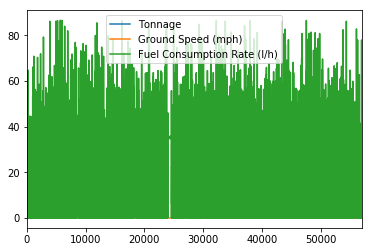

In [7]:
m_data[['Tonnage', 'Ground Speed (mph)', 'Fuel Consumption Rate (l/h)']].plot()

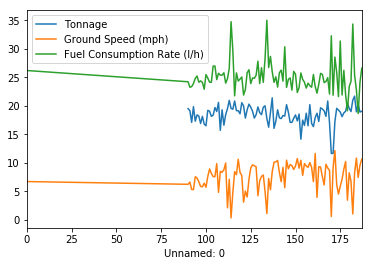

In [8]:
m_data_mean = m_data.groupby(['Unnamed: 0']).mean()
m_data_mean[['Tonnage', 'Ground Speed (mph)', 'Fuel Consumption Rate (l/h)']].plot()

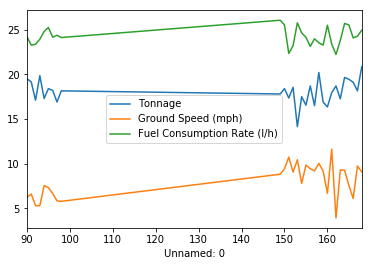

In [9]:
# filter to most common for first 4 files - TippleName: 112W10, DrawPoint: DP103
# m_data_filtered = m_data[(m_data['TippleName'] == '_SP108W') & (m_data['DrawPoint'] == '108W04')]
m_data_filtered = m_data[(m_data['TippleName'] == 'DP102')&(m_data['DrawPoint'] == '108W04')]

# bogger_combined = m_data['DrawPoint'] + m_data['TippleName']
# bogger_combined.value_counts() # 112W10DP103      1093
m_data_mean_filtered = m_data_filtered.groupby(['Unnamed: 0']).mean()
m_data_mean_filtered[['Tonnage', 'Ground Speed (mph)', 'Fuel Consumption Rate (l/h)']].plot()